<a href="https://colab.research.google.com/github/aimbesi1/CSC_4850-MachineLearning-Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Default imports

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Specific imports
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline, make_pipeline

Using the housing dataset from Kaggle: https://www.kaggle.com/datasets/mirbektoktogaraev/madrid-real-estate-market

In [2]:
### Manually download it and upload to this istance data sample space
### Note DO NOT change these operations or all your answers will be incorrect

### Let's do some transformations and extra features on this.
df=pd.read_csv('houses_Madrid.csv', encoding='utf-8')
pd.set_option('display.max_columns', 100)

In [3]:
df

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,"Calle de Godella, 64",False,Calle de Godella,64,NaN,3,False,NaN,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,471,NaN,False,85000,1328,True,HouseType 1: Pisos,False,False,1960.0,NaN,NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,NaN,Calle de la del Manojo de Rosas,True,Calle de la del Manojo de Rosas,NaN,NaN,4,False,NaN,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,sale,666,NaN,False,129900,1856,True,HouseType 1: Pisos,True,False,NaN,NaN,NaN,NaN,NaN,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,NaN,"Calle del Talco, 68",False,Calle del Talco,68,NaN,1,False,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,722,NaN,False,144247,1535,True,HouseType 1: Pisos,False,False,NaN,False,True,NaN,NaN,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,NaN,Calle Pedro Jiménez,True,Calle Pedro Jiménez,NaN,NaN,Bajo,True,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,583,NaN,False,109900,1717,True,HouseType 1: Pisos,False,False,1955.0,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,True,NaN,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,NaN,Carretera de Villaverde a Vallecas,True,Carretera de Villaverde a Vallecas,NaN,NaN,4,False,NaN,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,sale,1094,NaN,False,260000,2407,True,HouseType 1: Pisos,False,False,2003.0,NaN,NaN,NaN,True,True,True,True,NaN,True,NaN,NaN,True,NaN,NaN,NaN,True,en trámite,True,NaN,NaN,True,0.0,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,21737,5,Ático en venta en Casco Histórico de Barajas,"Barajas, Madrid",78.0,NaN,2,2.0,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,4,False,NaN,Neighborhood 10: Casco Histórico de Barajas (3...,sale,1323,NaN,False,350000,4487,True,HouseType 5: Áticos,False,False,2020.0,False,True,NaN,True,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,en trámite,True,NaN,NaN,True,0.0,NaN,NaN,NaN,NaN
21738,21738,4,Piso en venta en Urb. Campo de las Naciones - ...,"Barajas, Madrid",96.0,83.0,2,2.0,NaN,NaN,NaN,NaN,Urb. Campo de las Naciones - Corralejos,True,Urb. Campo de las Naciones - Corralejos,NaN,NaN,3,False,NaN,Neighborhood 9: Campo de las Naciones-Corralej...,sale,1496,NaN,False,425000,4427,True,HouseType 1: Pisos,False,False,2002.0,False,True,NaN,True,True,True,True,NaN,True,NaN,NaN,True,NaN,NaN,NaN,True,en t

In [4]:
df[['sq_mt_built', 'sq_mt_useful', 'sq_mt_allotment']].describe()

,sq_mt_built,sq_mt_useful,sq_mt_allotment
count,21616.000000,8228.000000,1432.000000
mean,146.920892,103.458192,241.692737
std,134.181865,88.259192,247.484853
min,13.000000,1.000000,1.000000
25%,70.000000,59.000000,2.000000
50%,100.000000,79.000000,232.000000
75%,162.000000,113.000000,354.000000
max,999.000000,998.000000,997.000000


In [5]:
df[['has_parking', 'parking_price', 'is_parking_included_in_price']]

,has_parking,parking_price,is_parking_included_in_price
0,False,NaN,NaN
1,False,NaN,NaN
2,False,NaN,NaN
3,False,NaN,NaN
4,True,0.0,True
...,...,...,...
21737,True,0.0,True
21738,True,0.0,True
21739,True,0.0,True
21740,True,0.0,True


In [6]:
# Examine data
# More floors than rooms in some houses?
df[["n_rooms", "n_floors"]].loc[df["n_rooms"] < df["n_floors"]].describe()

,n_rooms,n_floors
count,33.000000,33.000000
mean,2.909091,3.939394
std,0.765001,0.747470
min,1.000000,2.000000
25%,3.000000,4.000000
50%,3.000000,4.000000
75%,3.000000,4.000000
max,4.000000,5.000000


Skew: 3.323645232729084


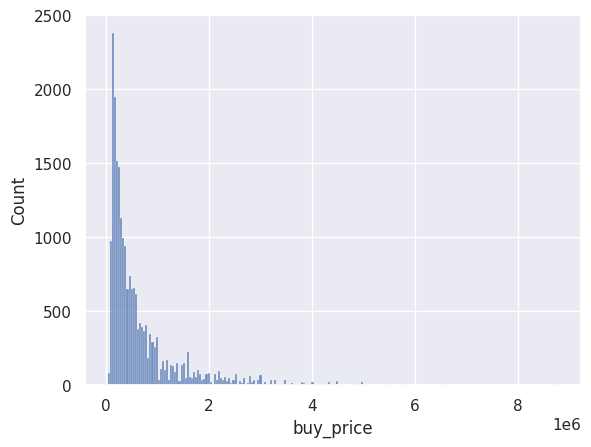

In [7]:
# Target value is not normally distributed
sns.histplot(df['buy_price'])
print(f"Skew: {df['buy_price'].skew()}")

In [8]:
df.loc[df["n_floors"].notna()].describe()

,Unnamed: 0,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,portal,door,rent_price,rent_price_by_area,buy_price,buy_price_by_area,built_year,are_pets_allowed,is_furnished,is_kitchen_equipped,has_private_parking,has_public_parking,parking_price
count,1437.000000,1437.000000,1355.000000,276.000000,1437.000000,1437.000000,1437.000000,1109.000000,0.0,0.0,0.0,0.0,1.437000e+03,0.0,1.437000e+03,1437.000000,796.000000,0.0,0.0,0.0,0.0,0.0,1118.0
mean,10012.014614,11729.985386,431.178598,343.369565,5.330550,4.711204,3.128740,250.836790,NaN,NaN,NaN,NaN,-4.334992e+05,NaN,1.770912e+06,3742.511482,1987.026382,NaN,NaN,NaN,NaN,NaN,0.0
std,4469.207033,4469.207033,210.159303,205.319567,1.794837,1.824689,0.907713,245.295253,NaN,NaN,NaN,NaN,2.537731e+06,NaN,1.283008e+06,1711.353732,20.184571,NaN,NaN,NaN,NaN,NaN,0.0
min,85.000000,2.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,-3.294594e+07,NaN,9.000000e+04,1060.000000,1916.000000,NaN,NaN,NaN,NaN,NaN,0.0
25%,7666.000000,10961.000000,285.500000,209.250000,4.000000,3.000000,2.000000,3.000000,NaN,NaN,NaN,NaN,-6.593300e+04,NaN,8.950000e+05,2610.000000,1975.750000,NaN,NaN,NaN,NaN,NaN,0.0
50%,9129.000000,12613.000000,391.000000,310.500000,5.000000,5.000000,3.000000,244.000000,NaN,NaN,NaN,NaN,-1.225000e+03,NaN,1.450000e+06,3358.000000,1990.000000,NaN,NaN,NaN,NaN,NaN,0.0
75%,10781.000000,14076.000000,550.000000,438.500000,6.000000,6.000000,4.000000,355.000000,NaN,NaN,NaN,NaN,2.012000e+03,NaN,2.300000e+06,4380.000000,2001.000000,NaN,NaN,NaN,NaN,NaN,0.0
max,21740.000000,21657.000000,999.000000,998.000000,24.000000,16.000000,7.000000,997.000000,NaN,NaN,NaN,NaN,2.517000e+03,NaN,8.700000e+06,12500.000000,2022.000000,NaN,NaN,NaN,NaN,NaN,0.0


In [9]:
df.loc[(df["built_year"].notnull()) & (df["has_central_heating"].notnull())].describe()

,Unnamed: 0,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,portal,door,rent_price,rent_price_by_area,buy_price,buy_price_by_area,built_year,are_pets_allowed,is_furnished,is_kitchen_equipped,has_private_parking,has_public_parking,parking_price
count,7904.000000,7904.000000,7875.000000,3755.000000,7904.000000,7901.000000,592.000000,588.000000,0.0,0.0,0.0,0.0,7.904000e+03,0.0,7.904000e+03,7904.000000,7904.000000,0.0,0.0,0.0,0.0,0.0,2995.000000
mean,11288.359312,10453.640688,149.586413,108.363782,3.046812,2.105177,3.244932,253.654762,NaN,NaN,NaN,NaN,-4.575498e+04,NaN,6.451505e+05,3999.848305,1969.802632,NaN,NaN,NaN,NaN,NaN,2843.391653
std,6184.061101,6184.061101,134.181847,91.894062,1.491834,1.370928,0.874033,233.770199,NaN,NaN,NaN,NaN,8.141551e+05,NaN,7.320353e+05,1787.407991,30.922065,NaN,NaN,NaN,NaN,NaN,14712.337261
min,5.000000,3.000000,15.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,-3.294594e+07,NaN,3.600000e+04,706.000000,1723.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,5959.250000,4966.250000,72.000000,60.000000,2.000000,1.000000,3.000000,3.000000,NaN,NaN,NaN,NaN,7.620000e+02,NaN,2.100000e+05,2639.000000,1958.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,11311.500000,10430.500000,102.000000,82.000000,3.000000,2.000000,3.000000,250.000000,NaN,NaN,NaN,NaN,1.157000e+03,NaN,3.900000e+05,3770.500000,1970.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,16775.750000,15782.750000,168.000000,120.000000,4.000000,2.000000,4.000000,355.000000,NaN,NaN,NaN,NaN,1.735000e+03,NaN,7.698500e+05,4944.000000,1994.000000,NaN,NaN,NaN,NaN,NaN,0.000000
max,21739.000000,21737.000000,999.000000,998.000000,24.000000,13.000000,7.000000,994.000000,NaN,NaN,NaN,NaN,2.517000e+03,NaN,8.700000e+06,14542.000000,2022.000000,NaN,NaN,NaN,NaN,NaN,600000.000000


In [10]:
df[["has_ac", "has_fitted_wardrobes", "has_garden", "has_pool", "has_terrace", 
    "has_balcony", "has_storage_room", "is_accessible", "has_green_zones", 
    "is_parking_included_in_price"]].describe()

,has_ac,has_fitted_wardrobes,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,is_parking_included_in_price
count,11211,13399,1556,5171,9548,3321,7698,4074,4057,7719
unique,1,1,1,1,1,1,1,1,1,2
top,True,True,True,True,True,True,True,True,True,True
freq,11211,13399,1556,5171,9548,3321,7698,4074,4057,7115


In [11]:
# Select/clean features here
# Remove empty/nearly empty/irrelevant/correlated columns

df1 = df.drop(columns=["title", "subtitle", "operation", "latitude", "longitude", "portal", "floor", "door",
  "rent_price_by_area", "are_pets_allowed", "is_furnished", "is_kitchen_equipped", 
  "has_public_parking", "has_private_parking", "sq_mt_useful", "sq_mt_allotment", "raw_address",
  "is_exact_address_hidden", "street_name", "street_number", "is_rent_price_known",
  "is_buy_price_known", "is_renewal_needed", "is_parking_included_in_price", "parking_price",
  "rent_price", "buy_price_by_area", "is_orientation_west", "is_orientation_east", 
  "is_orientation_south", "is_orientation_north", "is_floor_under",
  "is_exterior", "has_lift"])

df1 = df1.loc[:,~df1.columns.str.match("Unnamed: 0")]

# Delete rows with too much missing data
df1.drop(df1[df1["n_rooms"] < df1["n_floors"]].index, inplace=True)

df1.drop(df1[df1["house_type_id"].isnull()].index, inplace=True)
df1.drop(df1[df1["n_rooms"] == 0].index, inplace=True)
df1.drop(df1[df1["built_year"].isnull()].index, inplace=True)
df1.drop(df1[df1["has_central_heating"].isnull()].index, inplace=True)
df1.drop(df1[df1["is_new_development"].isnull()].index, inplace=True)
df1.drop(df1[df1["sq_mt_built"].isnull()].index, inplace=True)

# Fill in missing values with reasonable values
df1.fillna({
    "n_floors": 1, 
    "has_ac": False, 
    "has_fitted_wardrobes" : False, 
    "has_garden" : False, 
    "has_pool" : False, 
    "has_terrace" : False, 
    "has_balcony" : False, 
    "has_storage_room" : False, 
    "is_accessible" : False, 
    "has_green_zones" : False,
    "n_bathrooms" : df1['n_bathrooms'].mean()},  inplace=True)

# Cities in Spain are divided into districts which are then divided into neighborhoods.
# Let's make a separate column for district IDs.
df1['district_id'] = df1.neighborhood_id.str.extract(r'(District \d+)')
df1['district_id'] = df1.district_id.str.extract(r'(\d+)')
df1['neighborhood_id'] = df1.neighborhood_id.str.extract(r'(Neighborhood \d+)')
df1['neighborhood_id'] = df1.neighborhood_id.str.extract(r'(\d+)')

# House types are as follows:
# 1: Apartment/flat
# 2: House or chalet (type of wood house)
# 4: Duplex (double house)
# 5: Penthouses
# Let's also numericize the house_type_id column
df1['house_type_id'] = df1.house_type_id.str.extract(r'(HouseType \d+)')
df1['house_type_id'] = df1.house_type_id.str.extract(r'(\d+)')

# One-hot encode the district, energy certificate, and type IDs so that the ML models don't misinterpret them as continuous number values
df1 = pd.get_dummies(df1, columns=['district_id', 'house_type_id', 'energy_certificate'])

# Show the missing values dataset
df1.loc[df1.isnull().any(axis=1)]

,id,sq_mt_built,n_rooms,n_bathrooms,n_floors,neighborhood_id,buy_price,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,has_parking,district_id_1,district_id_10,district_id_11,district_id_12,district_id_13,district_id_14,district_id_15,district_id_17,district_id_18,district_id_19,district_id_2,district_id_20,district_id_21,district_id_3,district_id_4,district_id_5,district_id_6,district_id_7,district_id_8,district_id_9,house_type_id_1,house_type_id_2,house_type_id_4,house_type_id_5,energy_certificate_A,energy_certificate_B,energy_certificate_C,energy_certificate_D,energy_certificate_E,energy_certificate_F,energy_certificate_G,energy_certificate_en trámite,energy_certificate_inmueble exento,energy_certificate_no indicado


In [12]:
# Show the dataset
df1

,id,sq_mt_built,n_rooms,n_bathrooms,n_floors,neighborhood_id,buy_price,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,has_parking,district_id_1,district_id_10,district_id_11,district_id_12,district_id_13,district_id_14,district_id_15,district_id_17,district_id_18,district_id_19,district_id_2,district_id_20,district_id_21,district_id_3,district_id_4,district_id_5,district_id_6,district_id_7,district_id_8,district_id_9,house_type_id_1,house_type_id_2,house_type_id_4,house_type_id_5,energy_certificate_A,energy_certificate_B,energy_certificate_C,energy_certificate_D,energy_certificate_E,energy_certificate_F,energy_certificate_G,energy_certificate_en trámite,energy_certificate_inmueble exento,energy_certificate_no indicado
5,21737,126.0,4,2.0,1.0,134,195000,False,1981.0,False,True,False,False,False,False,True,True,False,True,False,True,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
9,21733,85.0,2,1.0,1.0,133,131400,False,1950.0,False,True,False,False,False,False,True,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
14,21728,64.0,3,1.0,1.0,135,72000,False,1960.0,False,True,False,False,False,False,True,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
26,21716,75.0,3,1.0,1.0,134,138000,False,1984.0,False,True,True,True,False,False,True,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
28,21714,65.0,3,1.0,1.0,133,150000,False,1976.0,False,True,False,True,False,True,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21731,11,276.0,4,4.0,4.0,11,690000,False,2005.0,False,True,True,True,True,True,True,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
21732,10,74.0,2,1.0,1.0,10,239500,False,1988.0,False,True,False,True,False,True,False,False,False,False,True,True,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
21737,5,78.0,2,2.0,1.0,10,350000,False,2020.0,False,True,True,True,False,False,False,False,True,False,False,True,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
21738,4,96.0,2,2.0,1.0,9,425000,False,2002.0,False,True,True,True,False,True,False,False,True,False,True,True,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:

# df_final = df.iloc[:4000, :][['sq_mt_built', 'rent_price', 'buy_price']].dropna()
# df_short['high_price'] = df_short['buy_price'].apply(lambda x: 1 if x > np.median(df_short['buy_price']) else 0)

df_final = df1.dropna()

X = df_final.drop(columns=['buy_price', 'id'])
y = df_final['buy_price']
# y = df_short['high_price'].values
df_final

,id,sq_mt_built,n_rooms,n_bathrooms,n_floors,neighborhood_id,buy_price,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,has_parking,district_id_1,district_id_10,district_id_11,district_id_12,district_id_13,district_id_14,district_id_15,district_id_17,district_id_18,district_id_19,district_id_2,district_id_20,district_id_21,district_id_3,district_id_4,district_id_5,district_id_6,district_id_7,district_id_8,district_id_9,house_type_id_1,house_type_id_2,house_type_id_4,house_type_id_5,energy_certificate_A,energy_certificate_B,energy_certificate_C,energy_certificate_D,energy_certificate_E,energy_certificate_F,energy_certificate_G,energy_certificate_en trámite,energy_certificate_inmueble exento,energy_certificate_no indicado
5,21737,126.0,4,2.0,1.0,134,195000,False,1981.0,False,True,False,False,False,False,True,True,False,True,False,True,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
9,21733,85.0,2,1.0,1.0,133,131400,False,1950.0,False,True,False,False,False,False,True,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
14,21728,64.0,3,1.0,1.0,135,72000,False,1960.0,False,True,False,False,False,False,True,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
26,21716,75.0,3,1.0,1.0,134,138000,False,1984.0,False,True,True,True,False,False,True,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
28,21714,65.0,3,1.0,1.0,133,150000,False,1976.0,False,True,False,True,False,True,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21731,11,276.0,4,4.0,4.0,11,690000,False,2005.0,False,True,True,True,True,True,True,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
21732,10,74.0,2,1.0,1.0,10,239500,False,1988.0,False,True,False,True,False,True,False,False,False,False,True,True,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
21737,5,78.0,2,2.0,1.0,10,350000,False,2020.0,False,True,True,True,False,False,False,False,True,False,False,True,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
21738,4,96.0,2,2.0,1.0,9,425000,False,2002.0,False,True,True,True,False,True,False,False,True,False,True,True,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [14]:
# def discretize(y_subset, y, n):
#   quantiles = []
#   i = 0
#   while i <= n:
#     quantiles.append(y.quantile(i / n))
#     i = i + 1
#   return pd.cut(y_subset, bins=quantiles, labels=range(n))

def discretize(y_subset, y):
  return pd.cut(y_subset, bins=[0, y.quantile(0.25), y.quantile(0.5), y.quantile(0.75), y.quantile(1)], labels=[0, 1, 2, 3])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.50, random_state=1234)

y_train_d = pd.cut(y_train, bins=[0, y.quantile(0.25), y.quantile(0.5), y.quantile(0.75), y.quantile(1)], labels=[0, 1, 2, 3])
y_test_d = pd.cut(y_test, bins=[0, y.quantile(0.25), y.quantile(0.5), y.quantile(0.75), y.quantile(1)], labels=[0, 1, 2, 3])

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import svm
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

def init_models():
  dt = DecisionTreeClassifier(random_state=1234)
  perceptron = Perceptron(random_state=1234)
  nb = GaussianNB()
  log_reg = LogisticRegression(random_state=1234, solver='liblinear', multi_class='ovr', max_iter=150)
  lin_reg = make_pipeline(StandardScaler(), LinearRegression())
  ridge = make_pipeline(StandardScaler(), Ridge(alpha=0.5, fit_intercept=True, random_state=1234))
  lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.1, fit_intercept=True, random_state=1234))
  ef = make_pipeline(StandardScaler(), ElasticNet(alpha=0.9, fit_intercept=True, random_state=1234))
  svm_linear = make_pipeline(StandardScaler(), svm.SVC(kernel="linear", random_state=1234))
  svm_rbf = make_pipeline(StandardScaler(), svm.SVC(kernel="rbf", random_state=1234))
  gb = HistGradientBoostingClassifier(random_state=1234)
  mlp = make_pipeline(StandardScaler(), MLPClassifier(max_iter=100, solver='adam', early_stopping=True, random_state=1234))
  # svr_poly = svm.SVR(kernel="poly")

  dict_c = {
      "dt": dt,
      "perceptron": perceptron,
      "nb": nb,
      "log_reg": log_reg,
      "svm_linear": svm_linear,
      "svm_rbf": svm_rbf,
      "gb": gb,
      "mlp": mlp,
      # "lin_reg": lin_reg,
      # "ridge": ridge,
      # "lasso": lasso,
      # "ef": ef,
  }

  dict_r = {
      "lin_reg": lin_reg,
      "ridge": ridge,
      "lasso": lasso,
      "ef": ef,
  }

  return dict_c, dict_r

In [16]:

# Train Classifiers
def train_models(models, X_train, X_test, y_train, y_test, lc_dict, m_dict, b_dict):
  def get_metrics(model, X_train, y_train):
    scorer = {
        "precision": metrics.make_scorer(metrics.precision_score, average="weighted"),
        "recall": metrics.make_scorer(metrics.recall_score, average="weighted"),
        "accuracy": metrics.make_scorer(metrics.accuracy_score),
        "f1": metrics.make_scorer(metrics.f1_score, average="weighted")
    }
    cv = cross_validate(model, X_train, y_train, cv=10, scoring=scorer, return_train_score=False, return_estimator=True)
    print(cv)
    best_score_index = cv["test_accuracy"].argmax()
    best = cv["estimator"][best_score_index]
    return lc, cv, best

  def get_metrics_r(model, X_train, y_train):
    scorer = {
        "mae": metrics.make_scorer(metrics.mean_absolute_error),
        "rmse": metrics.make_scorer(metrics.mean_squared_error, squared=False),
        "r2": metrics.make_scorer(metrics.r2_score)
    }
    cv = cross_validate(model, X_train, y_train, cv=10, scoring=scorer, return_train_score=False, return_estimator=True)
    print(f"CV data: {cv}")
    best_score_index = cv["test_r2"].argmax()
    best = cv["estimator"][best_score_index]
    return lc, cv, best

  for key in models.keys():
    models[key].fit(X_train, y_train)
    # predY = models[key].predict(X_test)
    lc, cv, best = None, None, None
    if key in {"lin_reg", "ridge", "lasso", "ef"}:
      lc, cv, best = get_metrics_r(models[key], X_train, y_train)
    else:
      lc, cv, best = get_metrics(models[key], X_train, y_train)
    # lc_dict[key] = lc
    m_dict[key] = cv
    b_dict[key] = best

# Test Classifiers
def test_models(models, X_train, X_test, y_train, y_test, lc_dict, bp_dict, sc_dict):
  for key in models.keys():
  #   if key in {"svm_linear", "gb", "mlp"}:
  #     print(f"Found key {key}, scaling data")
  #     X_train_scaled = StandardScaler().fit_transform(X_train)
  #     X_test_scaled = StandardScaler().fit_transform(X_test)

  #     models[key].fit(X_train_scaled, y_train)
  #     predY = models[key].predict(X_test_scaled)
  #     lc = learning_curve(estimator=models[key], X=X_test, y=y_test, shuffle=True, random_state=1234)
  #   else:
    models[key].fit(X_train, y_train)
    predY = models[key].predict(X_test)

    train_score = models[key].score(X_train, y_train)
    test_score = models[key].score(X_test, y_test)

    lc = learning_curve(estimator=models[key], X=X_test, y=y_test, shuffle=True, random_state=1234)

    lc_dict[key] = lc
    bp_dict[key] = predY
    sc_dict[key] = (train_score, test_score)
    

# # Train Regression
# def train_regression(models, X_train, X_test, y_train, y_test, lc_dict, m_dict, b_dict):
#   def get_metrics(model, X_train, y_train):
#     scorer = {
#         "mae": metrics.make_scorer(metrics.mean_absolute_error),
#         "rmse": metrics.make_scorer(metrics.mean_squared_error, squared=True)
#     }
#     cv = cross_validate(model, X_train, y_train, cv=10, scoring=scorer, return_train_score=False, return_estimator=True)
#     print(f"CV data: {cv}")
#     best_score_index = cv["test_rmse"].argmin()
#     best = cv["estimator"][best_score_index]
#     return lc, cv, best


#   for key in models.keys():
#     lc, cv, best = None, None, None
#     # if key in {"lin_reg", "ridge", "lasso", "ef"}:
#     #   X_train_scaled = StandardScaler().fit_transform(X_train)
#     #   X_test_scaled = StandardScaler().fit_transform(X_test)

#     #   models[key].fit(X_train_scaled, y_train)
#     #   predY = models[key].predict(X_test_scaled)
#     #   lc, cv, best = get_metrics(models[key], X_train_scaled, y_train)
#     # else:
    
#     models[key].fit(X_train, y_train)
#     predY = models[key].predict(X_test)
#     lc, cv, best = get_metrics(models[key], X_train, y_train)
    
#     # lc_dict[key] = lc
#     m_dict[key] = cv
#     b_dict[key] = best

# # Test Regression
# def test_regression(models, X_train, X_test, y_train, y_test, lc_dict, bp_dict):
#   for key in models.keys():
#     lc, predY = None, None
#     # if key in {"lin_reg", "ridge", "lasso", "ef"}:
#     #   X_train_scaled = StandardScaler().fit_transform(X_train)
#     #   X_test_scaled = StandardScaler().fit_transform(X_test)

#     #   models[key].fit(X_train_scaled, y_train)
#     #   predY = models[key].predict(X_test_scaled)
#     #   lc = learning_curve(estimator=models[key], X=X_test_scaled, y=y_test, shuffle=True, random_state=1234)
#     # else:
#     print(f"Processing key {key}:")
#     models[key].fit(X_train, y_train)
#     predY = models[key].predict(X_test)
#     lc = learning_curve(estimator=models[key], X=X_test, y=y_test, shuffle=True, random_state=1234)

#     lc_dict[key] = lc
#     bp_dict[key] = predY

  
  



# def run_models(models, X_train, y_train, X_test, y_test):

#   # Decision Tree
#   models["dt"].fit(X_train, y_train)
#   pred_Y1 = models["dt"].predict(X_test)
#   print(metrics.classification_report(y_test, pred_Y1))

#   # SVM Linear
#   f1_scaledX = StandardScaler().fit(X_train).transform(X_train)
#   f1_scaledX_test = StandardScaler().fit(X_test).transform(X_test)

#   models["svm_linear"].fit(f1_scaledX, y_train)
#   pred_Y1 = models["svm_linear"].predict(f1_scaledX_test)
#   print(metrics.classification_report(y_test, pred_Y1))

#   sizes1, train_scores1, valid_scores1 = learning_curve(estimator = svm_linear, X = f1_scaledX_test, y=y_test, shuffle = True, random_state = 1234)

#   # RBF
#   models["svm_rbf"].fit(X_train, y_train)
#   pred_Y3 = models["svm_rbf"].predict(X_test)
#   print(metrics.classification_report(y_test, pred_Y3))

#   sizes3, train_scores3, valid_scores3 = learning_curve(estimator = svm_rbf, X = X_test, y=y_test, shuffle = True, random_state = 1234)


 

def show_learning_curve(ax, lc_sizes, train_scores, valid_scores, title, n):
  train_mean = train_scores.mean(axis=1)
  valid_mean = valid_scores.mean(axis=0)
  ax.plot(lc_sizes, train_mean, label = f"T. Error {n}")
  ax.plot(lc_sizes, valid_mean, label = f"V. Error {n}")
  ax.legend()
  ax.set_title(title)


In [17]:
##### Pipeline

''' 
For each sampling:
  Set up the models
  Initialize L: list of LCs (list of training scores + valid scores)
  Initialize M: list of metrics (predicted Y)
  

'''


def pipe(X, y):
  train_sizes = [0.50, 0.70, 0.80]
  # learning_curves and metrics are arrays of 3 dictionaries each.
  # Each dictionary will hold the learning curve and metrics data for each model in each fold. 
  learning_curves = np.array([{}, {}, {}])
  m_metrics = np.array([{}, {}, {}])
  models = ({}, {})
  best_models = {'c': np.array([{}, {}, {}]), 'r': np.array([{}, {}, {}])}
  best_scores = np.array([{}, {}, {}])
  best_predictions = np.array([{}, {}, {}])
  true_y = []
  true_y_d = []

  for i in range(len(train_sizes)):
    models = init_models()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_sizes[i], random_state=1234)

    # y_train_d = pd.cut(y_train, bins=[0, y.quantile(0.25), y.quantile(0.5), y.quantile(0.75), y.quantile(1)], labels=[0, 1, 2, 3])
    # y_test_d = pd.cut(y_test, bins=[0, y.quantile(0.25), y.quantile(0.5), y.quantile(0.75), y.quantile(1)], labels=[0, 1, 2, 3])

    y_train_d = discretize(y_train, y)
    y_test_d = discretize(y_test, y)
    
    true_y.append(y_test)
    true_y_d.append(y_test_d)
    # y_train_d.describe()


    # Test with 1 model
    train_models(models[0], X_train, X_test, y_train_d, y_test_d, learning_curves[i], m_metrics[i], best_models['c'][i])
    train_models(models[1], X_train, X_test, y_train, y_test, learning_curves[i], m_metrics[i], best_models['r'][i])
    
    
    # print(learning_curves[i])
    print(f"Metrics for sample {i}:")
    print(m_metrics[i])

    print(f"Best model in sample {i}:")
    print(best_models['r'][i])

    # Stop at 1 loop with break
    # break

    # Now train the best models on the whole training set
    
    test_models(best_models['c'][i], X_train, X_test, y_train_d, y_test_d, learning_curves[i], best_predictions[i], best_scores[i])
    test_models(best_models['r'][i], X_train, X_test, y_train, y_test, learning_curves[i], best_predictions[i], best_scores[i])

    print(f"Best prediction data for sample {i}:")
    print(best_predictions[i])

    
  
  # # Learning curves
  # f, ax = plt.subplots(1, (len(models[0]) + len(models[1])), figsize = (20, 15), sharey=True)
  # ax_idx = 0
  # for m_dict in models:
  #   for key in m_dict:
  #     for j in range(3):
  #       sizes, train_scores, test_scores = learning_curves[j][key]
  #       show_learning_curve(ax[ax_idx], sizes, train_scores, test_scores, key, (j+1))
  #     ax_idx = ax_idx + 1
  
  return learning_curves, m_metrics, best_models, best_predictions, best_scores, true_y, true_y_d

    


  
  

    


learning_curves, m_metrics, best_models, best_predictions, best_scores, true_y, true_y_d = pipe(X, y)

{'fit_time': array([0.11224914, 0.04532242, 0.08588791, 0.05332994, 0.04722738,
       0.04249501, 0.06592727, 0.07063746, 0.08221459, 0.04902315]), 'score_time': array([0.01798725, 0.02193022, 0.03046775, 0.01708102, 0.01574516,
       0.02928281, 0.01594281, 0.02329612, 0.06964064, 0.01498199]), 'estimator': [DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234)], 'test_precision': array([0.75116794, 0.76194895, 0.70234059, 0.76448872, 0.7165331 ,
       0.75216913, 0.77864625, 0.73127472, 0.78179691, 0.78149238]), 'test_recall': array([0.75132275, 0.75396825, 0.70634921, 0.76719577, 0.71693122,
       0.75396825, 0

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Pr

{'fit_time': array([0.04938149, 0.06077552, 0.04174018, 0.05229163, 0.08166504,
       0.06808782, 0.06014538, 0.06534719, 0.0511992 , 0.04665613]), 'score_time': array([0.02996707, 0.01536059, 0.01683068, 0.03071713, 0.0398314 ,
       0.01553011, 0.02384281, 0.01568961, 0.03824139, 0.01538539]), 'estimator': [Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234)], 'test_precision': array([0.46869988, 0.60962091, 0.41180471, 0.62045586, 0.41504732,
       0.45941178, 0.27642926, 0.42050783, 0.30879029, 0.29171775]), 'test_recall': array([0.56878307, 0.55026455, 0.54232804, 0.62169312, 0.44708995,
       0.4973545 , 0.48148148, 0.54232804, 0.45502646, 0.4801061 ]), 'test_accuracy': array([0.56878307, 0.55026455, 0.54232804, 0.62169312,

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.822e+14, tolerance: 1.827e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.689e+14, tolerance: 1.671e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.675e+14, tolerance: 1.680e+11

CV data: {'fit_time': array([0.24817729, 0.29777122, 0.34260225, 0.38432074, 0.37908626,
       0.38567615, 0.3575561 , 0.42459583, 0.41254616, 0.28852916]), 'score_time': array([0.00588894, 0.01059628, 0.01682448, 0.0196898 , 0.02108383,
       0.01961493, 0.01885629, 0.02208424, 0.00590873, 0.00618386]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1, random_state=1234))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1, random_state=1234))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1, random_state=1234))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1, random_state=1234))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1, random_state=1234))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso'

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.822e+14, tolerance: 1.827e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.218e+12, tolerance: 1.148e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.013e+13, tolerance: 5.532e+10

Best prediction data for sample 0:
{'dt': array([3, 0, 0, ..., 1, 2, 2]), 'perceptron': array([2, 1, 1, ..., 1, 1, 2]), 'nb': array([3, 0, 3, ..., 0, 3, 3]), 'log_reg': array([3, 0, 2, ..., 1, 3, 3]), 'svm_linear': array([2, 0, 1, ..., 1, 2, 3]), 'svm_rbf': array([3, 0, 0, ..., 1, 2, 3]), 'gb': array([2, 0, 1, ..., 1, 2, 3]), 'mlp': array([3, 0, 1, ..., 1, 2, 3]), 'lin_reg': array([ 673849.47996051,   83613.47996051,  252473.47996051, ...,
        299929.47996051,  893945.47996051, 1114219.97996051]), 'ridge': array([ 676356.07040309,   83677.34271415,  250675.5090728 , ...,
        299030.90635412,  893208.15514517, 1115032.83068534]), 'lasso': array([ 675768.3147651 ,   83708.19040614,  250949.84543162, ...,
        299240.04920711,  893427.11949062, 1114756.91198857]), 'ef': array([ 866558.32886709,   96347.5563255 ,  260153.43544912, ...,
        314767.69233288,  821868.90113726, 1190405.33226608])}
{'fit_time': array([0.06291223, 0.06702018, 0.06331682, 0.05619788, 0.05636168,
  

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Pr

{'fit_time': array([0.07448959, 0.07204771, 0.0679667 , 0.07178426, 0.05695438,
       0.05623603, 0.06341028, 0.0686214 , 0.07587814, 0.0722394 ]), 'score_time': array([0.01537132, 0.01503992, 0.01529312, 0.01747847, 0.01432443,
       0.01458836, 0.0163784 , 0.01654959, 0.01549602, 0.0167141 ]), 'estimator': [Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234)], 'test_precision': array([0.39833429, 0.45816194, 0.56187872, 0.35533928, 0.44001043,
       0.38204198, 0.51069144, 0.25895009, 0.47966425, 0.4781118 ]), 'test_recall': array([0.51228733, 0.37996219, 0.4536862 , 0.48582231, 0.4536862 ,
       0.47069943, 0.42722117, 0.48771267, 0.62381853, 0.53875236]), 'test_accuracy': array([0.51228733, 0.37996219, 0.4536862 , 0.48582231,

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.554e+14, tolerance: 2.624e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.395e+14, tolerance: 2.381e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.170e+14, tolerance: 2.264e+11

CV data: {'fit_time': array([0.36518955, 0.30014992, 0.33092475, 0.40472555, 0.33426118,
       0.37453389, 0.36323619, 0.3744278 , 0.3766911 , 0.37340856]), 'score_time': array([0.00671911, 0.01018643, 0.01202559, 0.00640059, 0.00675559,
       0.01046276, 0.00758219, 0.00623512, 0.00614715, 0.00848055]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1, random_state=1234))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1, random_state=1234))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1, random_state=1234))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1, random_state=1234))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1, random_state=1234))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso'

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.554e+14, tolerance: 2.624e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.373e+12, tolerance: 1.697e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.070e+13, tolerance: 3.801e+10

Best prediction data for sample 1:
{'dt': array([2, 0, 0, ..., 1, 2, 0]), 'perceptron': array([3, 0, 3, ..., 3, 3, 0]), 'nb': array([3, 0, 3, ..., 1, 3, 0]), 'log_reg': array([3, 0, 2, ..., 1, 1, 0]), 'svm_linear': array([2, 0, 1, ..., 1, 2, 0]), 'svm_rbf': array([2, 0, 1, ..., 1, 2, 0]), 'gb': array([2, 0, 1, ..., 1, 2, 0]), 'mlp': array([3, 0, 1, ..., 1, 1, 0]), 'lin_reg': array([687151.67413994,  91935.67413994, 233007.67413994, ...,
       340383.67413994, 528411.67413994, 107067.67413994]), 'ridge': array([689833.01930492,  90237.82168224, 232915.7142753 , ...,
       346586.98000241, 530875.69511361, 107603.66922927]), 'lasso': array([689881.63040329,  90261.38789281, 232815.22384988, ...,
       346554.1615951 , 530938.86965862, 107481.70168514]), 'ef': array([878986.23845014,  96007.82441572, 252445.45395939, ...,
       326136.44902023, 540464.17494953,  92198.69537422])}
{'fit_time': array([0.06324339, 0.05965972, 0.06821823, 0.06283808, 0.06344986,
       0.06528878, 0.06450

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Pr

{'fit_time': array([0.06378031, 0.0721972 , 0.06970501, 0.05956173, 0.06885195,
       0.09176183, 0.05867052, 0.06167793, 0.0580399 , 0.08273935]), 'score_time': array([0.01593947, 0.01505041, 0.01410007, 0.02021432, 0.01537871,
       0.02200723, 0.0151782 , 0.01592374, 0.0156858 , 0.01832581]), 'estimator': [Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234), Perceptron(random_state=1234)], 'test_precision': array([0.48597641, 0.70133209, 0.55422109, 0.47650379, 0.46964608,
       0.50267051, 0.25917019, 0.20844634, 0.46314334, 0.49473696]), 'test_recall': array([0.60661157, 0.40991736, 0.38842975, 0.48595041, 0.5322314 ,
       0.57520661, 0.47019868, 0.4205298 , 0.59271523, 0.5910596 ]), 'test_accuracy': array([0.60661157, 0.40991736, 0.38842975, 0.48595041,

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.844e+14, tolerance: 2.928e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.638e+14, tolerance: 2.682e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+14, tolerance: 2.662e+11

CV data: {'fit_time': array([0.37158871, 0.34142709, 0.39728045, 0.38568258, 0.40801525,
       0.39183545, 0.42143989, 0.39093566, 0.42465472, 0.40147495]), 'score_time': array([0.00662279, 0.0105195 , 0.01052785, 0.0107367 , 0.011482  ,
       0.01052761, 0.01075292, 0.01085234, 0.01066923, 0.01042509]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1, random_state=1234))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1, random_state=1234))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1, random_state=1234))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1, random_state=1234))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1, random_state=1234))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso'

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.844e+14, tolerance: 2.928e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.596e+12, tolerance: 5.906e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.186e+13, tolerance: 2.323e+10

Best prediction data for sample 2:
{'dt': array([2, 0, 0, ..., 3, 0, 1]), 'perceptron': array([3, 0, 3, ..., 3, 0, 0]), 'nb': array([3, 0, 3, ..., 3, 0, 3]), 'log_reg': array([2, 0, 2, ..., 3, 0, 1]), 'svm_linear': array([2, 0, 1, ..., 2, 0, 1]), 'svm_rbf': array([2, 0, 0, ..., 2, 0, 1]), 'gb': array([2, 0, 1, ..., 3, 0, 1]), 'mlp': array([3, 0, 1, ..., 2, 0, 1]), 'lin_reg': array([668514.80548965,  84450.80548965, 235778.80548965, ...,
       980258.80548965,  80978.80548965, 220514.80548965]), 'ridge': array([668422.14780388,  83051.12667369, 234927.29519483, ...,
       980673.7320295 ,  83515.79356377, 222707.26030281]), 'lasso': array([668867.57476694,  83079.94848405, 234590.99493922, ...,
       980293.15668322,  83363.96508903, 222775.7393521 ]), 'ef': array([868856.93698441,  88918.61485041, 246770.25533695, ...,
       915473.36256815,  42639.34066327, 253844.61682194])}


In [18]:
pipe_data = (learning_curves, m_metrics, best_models, best_predictions, best_scores, true_y, true_y_d)

In [19]:
print(true_y_d)

[13964    2
5846     0
8855     1
16153    0
7702     3
        ..
4702     0
2282     1
3673     1
19143    2
11028    3
Name: buy_price, Length: 3779, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3], 13964    2
5846     0
8855     1
16153    0
7702     3
        ..
9197     1
19740    2
20458    1
2857     2
13228    0
Name: buy_price, Length: 2268, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3], 13964    2
5846     0
8855     1
16153    0
7702     3
        ..
3429     0
14305    3
21181    3
3357     0
17695    1
Name: buy_price, Length: 1512, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]]


In [20]:
print(learning_curves)

[{'dt': (array([ 302,  982, 1662, 2342, 3023]), array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 0.99898167, 1.        , 1.        , 1.        ],
        [1.        , 0.99939832, 1.        , 1.        , 0.99939832],
        [0.99957301, 0.99957301, 1.        , 1.        , 0.99957301],
        [0.9996692 , 0.9996692 , 1.        , 1.        , 0.9996692 ]]), array([[0.68783069, 0.64417989, 0.64417989, 0.68386243, 0.68476821],
        [0.74074074, 0.70634921, 0.72089947, 0.74206349, 0.75761589],
        [0.72222222, 0.72222222, 0.73412698, 0.73412698, 0.74437086],
        [0.72619048, 0.74206349, 0.74867725, 0.72751323, 0.74437086],
        [0.73544974, 0.76190476, 0.76455026, 0.76190476, 0.7615894 ]])), 'perceptron': (array([ 302,  982, 1662, 2342, 3023]), array([[0.39735099, 0.45033113, 0.48675497, 0.40728477, 0.51655629],
        [0.41242363, 0.55906314, 0.5407332 , 0.4114053 , 0.47759674],
        [0.54452467, 0.40312876, 0.52045728, 0.54693141,

In [21]:
# import json

# bm_list = {'c': best_models['c'].tolist(), 'r': best_models['r'].tolist()}
# lc_list = learning_curves.tolist()
# for d in lc_list:
#   for key in d.keys():
#     for a in d[key]:
#       print(a)
# pipe_data_list = (lc_list, bm_list, best_predictions.tolist(), best_scores.tolist())
# with open('data.json', 'w') as f:
#   json.dump(pipe_data_list, f)

In [22]:
print(best_scores)

[{'dt': (1.0, 0.7584016935697274), 'perceptron': (0.43556496427626357, 0.42921407779835935), 'nb': (0.5287112992855253, 0.5273881979359619), 'log_reg': (0.7697803651759725, 0.7586663138396401), 'svm_linear': (0.8298491664461498, 0.8097380259327864), 'svm_rbf': (0.8536649907382906, 0.7721619476051865), 'gb': (0.9960306959513099, 0.8338184704948399), 'mlp': (0.8306430272558878, 0.7745435300344007), 'lin_reg': (0.7996939068166292, 0.7968014794679692), 'ridge': (0.7996923070058998, 0.7967525589220911), 'lasso': (0.7996930430325698, 0.7967595068245612), 'ef': (0.7294927488991299, 0.7304769258497846)}
 {'dt': (1.0, 0.7724867724867724), 'perceptron': (0.40926275992438566, 0.4131393298059965), 'nb': (0.5311909262759924, 0.5308641975308642), 'log_reg': (0.7638941398865785, 0.7332451499118166), 'svm_linear': (0.832703213610586, 0.8024691358024691), 'svm_rbf': (0.8483931947069944, 0.777336860670194), 'gb': (0.9920604914933837, 0.8245149911816578), 'mlp': (0.8228733459357278, 0.7689594356261023), 

In [23]:
print(m_metrics)

[{'dt': {'fit_time': array([0.11224914, 0.04532242, 0.08588791, 0.05332994, 0.04722738,
        0.04249501, 0.06592727, 0.07063746, 0.08221459, 0.04902315]), 'score_time': array([0.01798725, 0.02193022, 0.03046775, 0.01708102, 0.01574516,
        0.02928281, 0.01594281, 0.02329612, 0.06964064, 0.01498199]), 'estimator': [DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234), DecisionTreeClassifier(random_state=1234)], 'test_precision': array([0.75116794, 0.76194895, 0.70234059, 0.76448872, 0.7165331 ,
        0.75216913, 0.77864625, 0.73127472, 0.78179691, 0.78149238]), 'test_recall': array([0.75132275, 0.75396825, 0.70634921, 0.76719577, 0.71693122,
        0

In [24]:
# Show the performance for every model instance on every training fold


fold_tables = [pd.DataFrame(columns=['Model', 'Precision/RMSE', 'Recall/MAE', 'F1/R2', 'Accuracy'])] * 3
for sample in range(3):
  for key in m_metrics[sample]:
    for fold in range(10):
      model_id = f"{key} {fold+1}"
      if key in {"lin_reg", "ridge", "lasso", "ef"}:
        pr = m_metrics[sample][key]['test_rmse'][fold]
        rc = m_metrics[sample][key]['test_mae'][fold]
        f1 = m_metrics[sample][key]['test_r2'][fold]
        acc = None
      else:
        pr = m_metrics[sample][key]['test_precision'][fold]
        rc = m_metrics[sample][key]['test_recall'][fold]
        f1 = m_metrics[sample][key]['test_f1'][fold]
        acc = m_metrics[sample][key]['test_accuracy'][fold]
      m_row = pd.DataFrame([{'Model': model_id, 'Precision/RMSE': pr, 'Recall/MAE': rc, 'F1/R2': f1, 'Accuracy': acc}])
      fold_tables[sample] = pd.concat([fold_tables[sample], m_row])

for table in fold_tables:
  display(table)

,Model,Precision/RMSE,Recall/MAE,F1/R2,Accuracy
0,dt 1,0.751168,0.751323,0.751235,0.751323
0,dt 2,0.761949,0.753968,0.756942,0.753968
0,dt 3,0.702341,0.706349,0.703737,0.706349
0,dt 4,0.764489,0.767196,0.765379,0.767196
0,dt 5,0.716533,0.716931,0.714978,0.716931
...,...,...,...,...,...
0,ef 6,273488.032233,159679.721358,0.792540,None
0,ef 7,320856.170096,185552.658628,0.733614,None
0,ef 8,432105.503923,198668.465720,0.658930,None
0,ef 9,372513.881978,193959.164864,0.729590,None


,Model,Precision/RMSE,Recall/MAE,F1/R2,Accuracy
0,dt 1,0.786209,0.782609,0.783822,0.782609
0,dt 2,0.795708,0.795841,0.795515,0.795841
0,dt 3,0.764147,0.767486,0.765157,0.767486
0,dt 4,0.738777,0.737240,0.737797,0.73724
0,dt 5,0.744369,0.746692,0.745064,0.746692
...,...,...,...,...,...
0,ef 6,369331.416527,175624.274207,0.693458,None
0,ef 7,261134.732010,168296.398110,0.800854,None
0,ef 8,332942.899532,191218.384743,0.737995,None
0,ef 9,403774.168268,194611.481575,0.688347,None


,Model,Precision/RMSE,Recall/MAE,F1/R2,Accuracy
0,dt 1,0.764511,0.763636,0.763894,0.763636
0,dt 2,0.777481,0.776860,0.777000,0.77686
0,dt 3,0.791586,0.791736,0.791539,0.791736
0,dt 4,0.789888,0.793388,0.790181,0.793388
0,dt 5,0.758578,0.757025,0.757609,0.757025
...,...,...,...,...,...
0,ef 6,385115.504957,201648.203758,0.711022,None
0,ef 7,372500.915116,188068.706405,0.722075,None
0,ef 8,311086.231200,179258.851383,0.739503,None
0,ef 9,379033.480915,185991.412001,0.709025,None


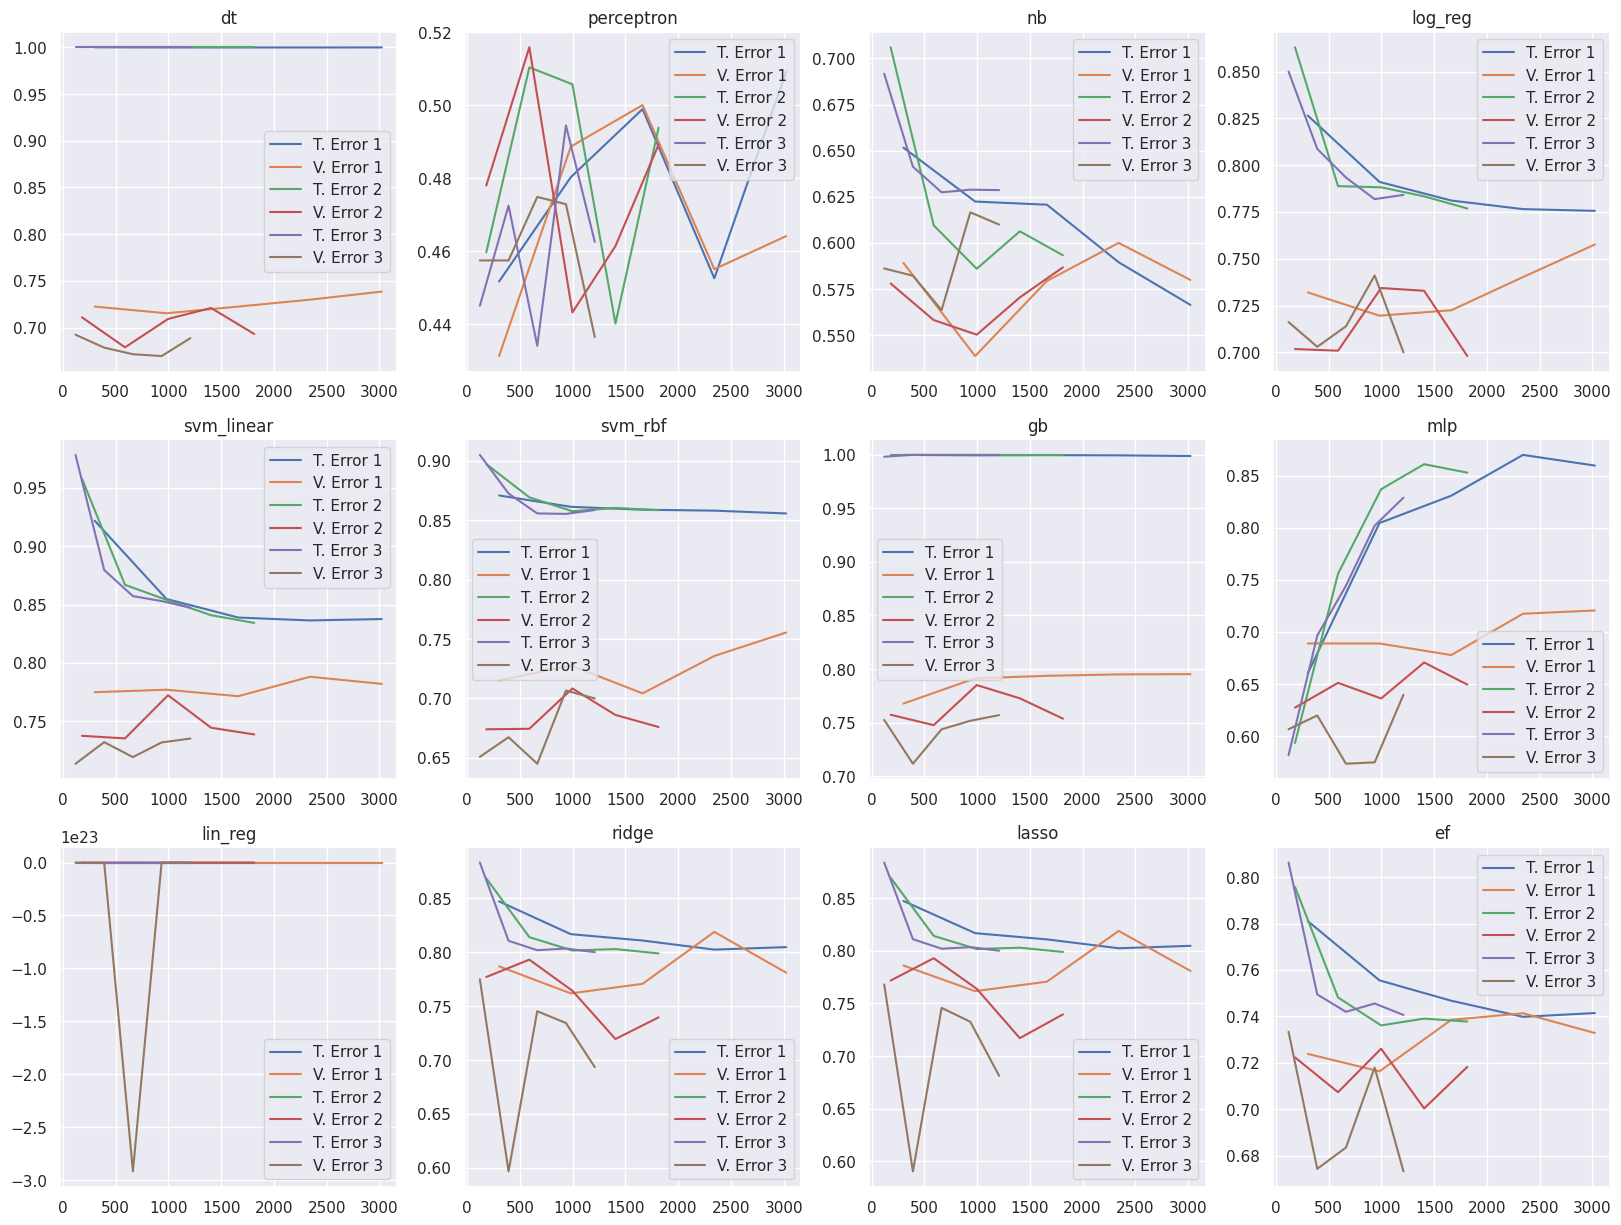

In [25]:
# Learning curves
f, ax = plt.subplots(3, 4, figsize = (20, 15))

ax_y = 0
ax_x = 0
for key in learning_curves[0].keys():
  # Fill out one plot
  for sample in range(3):
    sizes, train_scores, test_scores = learning_curves[sample][key]
    show_learning_curve(ax[ax_y][ax_x], sizes, train_scores, test_scores, key, (sample + 1))
  ax_x = ax_x + 1
  if ax_x >= len(ax[ax_y]):
    ax_y = ax_y + 1
    ax_x = 0

# f, ax = plt.subplots(1, (len(models[0]) + len(models[1])), figsize = (20, 15), sharey=True)
  # ax_idx = 0
  # for m_dict in models:
  #   for key in m_dict:
  #     for j in range(3):
  #       sizes, train_scores, test_scores = learning_curves[j][key]
  #       show_learning_curve(ax[ax_idx], sizes, train_scores, test_scores, key, (j+1))
  #     ax_idx = ax_idx + 1

In [26]:
# Pick best model

def get_best_metrics(key, sample):
  if key in {'lin_reg', 'ridge', 'lasso', 'ef'}:
    best_index = m_metrics[sample][key]['test_r2'].argmax()
    return {
        'mae': m_metrics[sample][key]['test_mae'][best_index],
        'rmse': m_metrics[sample][key]['test_rmse'][best_index],
        'r2': m_metrics[sample][key]['test_r2'][best_index]
    }
  else:
    best_index = m_metrics[sample][key]['test_accuracy'].argmax()
    return {
        'accuracy': m_metrics[sample][key]['test_accuracy'][best_index],
        'recall': m_metrics[sample][key]['test_recall'][best_index],
        'precision': m_metrics[sample][key]['test_precision'][best_index],
        'f1': m_metrics[sample][key]['test_f1'][best_index]
    }

def get_best_predict(key, sample):
  return best_predictions[sample][key]

model1 = best_models['r'][0]['lin_reg']
best_index = m_metrics[0]['lin_reg']['test_r2'].argmax()
model2 = m_metrics[0]['lin_reg']['estimator'][best_index]
print(model1 is model2)


best_table = pd.DataFrame()

print(best_scores[0]['lin_reg'])


        


True
(0.7996939068166292, 0.7968014794679692)


In [32]:
print(best_predictions[0]['gb'])

[2 0 1 ... 1 2 3]


[('gb', 0.8338184704948399), ('gb', 0.8245149911816578), ('gb', 0.8366402116402116)]
Best model:
(2, 'gb', 0.8366402116402116)
Best model's metrics:
{'accuracy': 0.8727272727272727, 'recall': 0.8727272727272727, 'precision': 0.8718349595411183, 'f1': 0.8717509378670643}
Best model's CM:
[[340  44   2   0]
 [ 51 294  37   0]
 [  0  39 288  37]
 [  0   0  37 343]]


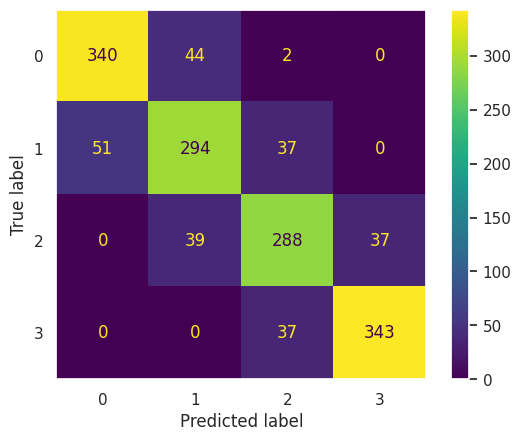

In [28]:
# Find the best model

top3models = []
for d in best_scores:
  max_key = ""
  max_val = 0
  for k in d.keys():
    if d[k][1] > max_val:
      max_val = d[k][1]
      max_key = k
  top3models.append((max_key, max_val))

print(top3models)

winner = None
for i in range(len(top3models)):
  max_idx = 0
  max_key = ""
  max_val = 0
  if top3models[i][1] > max_val:
    max_idx = i
    max_val = top3models[i][1]
    max_key = top3models[i][0]
  winner = (max_idx, max_key, max_val)
print("Best model:")
print(winner)

best_stats = get_best_metrics(winner[1], winner[0])

best_p = get_best_predict(winner[1], winner[0])

m_type = ''
if winner[1] in {'lin_reg', 'ridge', 'lasso', 'ef'}:
  m_type = 'r'
else:
  m_type = 'c'

winner_model = best_models[m_type][winner[0]][winner[1]]

# for i in range(len(m_metrics[2]['gb']['estimator'])):
#   if winner_model is m_metrics[2]['gb']['estimator'][i]:
#     print(i)
#     break

print("Best model's metrics:")
print(best_stats)

print("Best model's CM:")

cnf_matrix = metrics.confusion_matrix(true_y_d[winner[0]], best_p)
print(cnf_matrix)

ax = plt.subplot(1, 1, 1)
ax.grid(False)
cnf_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = winner_model.classes_)
cnf_display.plot(ax=ax)
plt.show()

In [29]:
ylist = []
y_dlist = []

for size in [0.50, 0.70, 0.80]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size, random_state=1234)

  y_train_d = discretize(y_train, y)
  y_test_d = discretize(y_test, y)
  ylist.append(y_test)
  y_dlist.append(y_test_d)

In [33]:
big_tables = [pd.DataFrame(columns=best_predictions[0].keys())] * 3

for sample in range(len(big_tables)):
  big_tables[sample]["Metric"] = ['Accuracy/RMSE', 'Precision/MAE', 'Recall/R2', 'F1']
  big_tables[sample].set_index('Metric')
  cols = big_tables[sample].columns.tolist()
  cols = cols[-1:] + cols[:-1]
  big_tables[sample] = big_tables[sample][cols]

  # Populate each table with the metrics for each model instance belonging to that table's sample
  for key in best_predictions[sample].keys():
    m_list = []
    if key in {'lin_reg', 'ridge', 'lasso', 'ef'}:
      rmse = metrics.mean_squared_error(true_y[sample], best_predictions[sample][key], squared=False)
      mae = metrics.mean_absolute_error(true_y[sample], best_predictions[sample][key])
      r2 = metrics.r2_score(true_y[sample], best_predictions[sample][key])
      m_list = [rmse, mae, r2, None]
    else:
      accuracy = metrics.accuracy_score(true_y_d[sample], best_predictions[sample][key])
      precision = metrics.precision_score(true_y_d[sample], best_predictions[sample][key], average="weighted")
      recall = metrics.recall_score(true_y_d[sample], best_predictions[sample][key], average="weighted")
      f1 = metrics.f1_score(true_y_d[sample], best_predictions[sample][key], average="weighted")
      m_list = [accuracy, precision, recall, f1]
    # print(m_list)
    big_tables[sample][key] = m_list
    # print("Insertion done")


for table in big_tables:
  display(table)

print(big_tables[1]['dt'])

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Metric,dt,perceptron,nb,log_reg,svm_linear,svm_rbf,gb,mlp,lin_reg,ridge,lasso,ef
0,Accuracy/RMSE,0.758402,0.429214,0.527388,0.758666,0.809738,0.772162,0.833818,0.774544,329942.723420,329982.438292,329976.798110,379993.580483
1,Precision/MAE,0.759923,0.668364,0.568257,0.755374,0.811919,0.780864,0.836048,0.775067,171334.268018,171336.549959,171345.946805,185002.035251
2,Recall/R2,0.758402,0.429214,0.527388,0.758666,0.809738,0.772162,0.833818,0.774544,0.796801,0.796753,0.796760,0.730477
3,F1,0.759100,0.364474,0.470939,0.754394,0.810407,0.775039,0.834695,0.774775,NaN,NaN,NaN,NaN


,Metric,dt,perceptron,nb,log_reg,svm_linear,svm_rbf,gb,mlp,lin_reg,ridge,lasso,ef
0,Accuracy/RMSE,0.772487,0.413139,0.530864,0.733245,0.802469,0.777337,0.824515,0.768959,338651.890472,338657.044433,338666.151295,384265.055635
1,Precision/MAE,0.774024,0.248448,0.567314,0.733518,0.805267,0.785386,0.825687,0.772481,173241.300918,173019.562351,173026.263647,188402.720208
2,Recall/R2,0.772487,0.413139,0.530864,0.733245,0.802469,0.777337,0.824515,0.768959,0.788248,0.788242,0.788230,0.727365
3,F1,0.773114,0.289116,0.479791,0.728172,0.802962,0.779925,0.824975,0.770358,NaN,NaN,NaN,NaN


,Metric,dt,perceptron,nb,log_reg,svm_linear,svm_rbf,gb,mlp,lin_reg,ridge,lasso,ef
0,Accuracy/RMSE,0.771825,0.487434,0.519180,0.734127,0.812169,0.773810,0.836640,0.787698,366070.054563,365984.796813,365993.748015,415816.881289
1,Precision/MAE,0.772770,0.335959,0.561118,0.729036,0.812955,0.779435,0.836344,0.788496,179942.531195,179694.916959,179698.094030,195659.289596
2,Recall/R2,0.771825,0.487434,0.519180,0.734127,0.812169,0.773810,0.836640,0.787698,0.780554,0.780656,0.780645,0.716858
3,F1,0.772064,0.380303,0.458043,0.726276,0.812197,0.775738,0.836474,0.788036,NaN,NaN,NaN,NaN


0    0.772487
1    0.774024
2    0.772487
3    0.773114
Name: dt, dtype: float64
